In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

In [3]:
df = pd.read_csv('ppg_churn.csv')

In [4]:
df_clean = df.select_dtypes('number').copy()

In [5]:
df_clean.head()

X02  X06    X07  X08    X09    X10  X11    X12    X13  X14    X15   X16  \
0  128   25  265.1  110  45.07  197.4   99  16.78  244.7   91  11.01  10.0   
1  107   26  161.6  123  27.47  195.5  103  16.62  254.4  103  11.45  13.7   
2  137    0  243.4  114  41.38  121.2  110  10.30  162.6  104   7.32  12.2   
3   84    0  299.4   71  50.90   61.9   88   5.26  196.9   89   8.86   6.6   
4   75    0  166.7  113  28.34  148.3  122  12.61  186.9  121   8.41  10.1   

   X17   X18  X19  
0    3  2.70    1  
1    3  3.70    1  
2    5  3.29    0  
3    7  1.78    2  
4    3  2.73    3

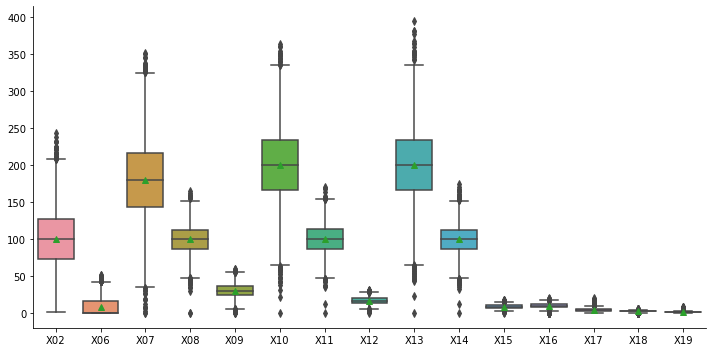

In [6]:
sns.catplot(data = df_clean, kind='box', aspect=2, showmeans=True)

plt.show()

As we can see we will need to standardize the variable into one scale.

In [7]:
X = StandardScaler().fit_transform(df_clean)

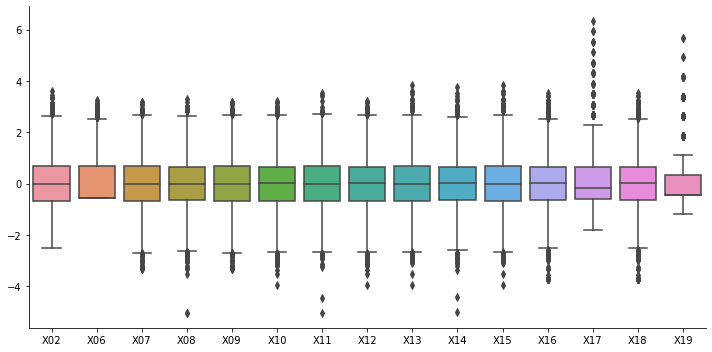

In [8]:
sns.catplot(data = pd.DataFrame(X, columns=df_clean.columns), kind='box', aspect=2)

plt.show()

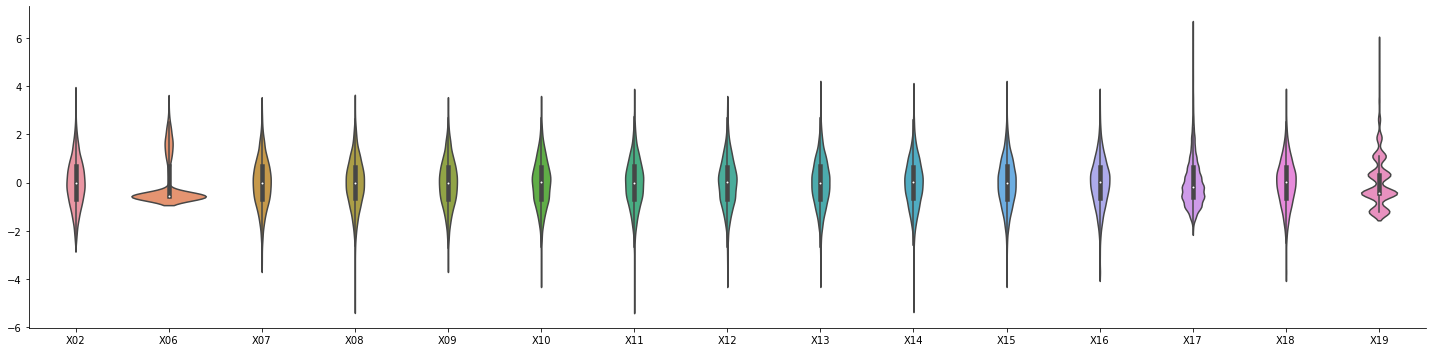

In [9]:
sns.catplot(data = pd.DataFrame(X, columns=df_clean.columns), kind='violin', aspect=4)

plt.show()

We can see from the above results that the variables `X06`,`X17`,`x19` are not "***Gaussian-like***"

In [10]:
df_clean.X06.value_counts()

0     3678
31      83
28      67
29      67
33      66
24      64
27      64
30      58
26      58
32      57
23      52
25      51
22      47
36      45
37      43
39      42
34      41
35      41
21      41
38      41
20      32
40      28
19      27
41      22
17      21
42      19
18      18
16      17
43      16
15      13
45      11
12      11
14       9
44       9
46       8
48       5
13       4
47       4
10       4
49       3
6        2
9        2
50       2
11       2
8        2
4        1
51       1
52       1
Name: X06, dtype: int64

In [11]:
df_clean.X17.value_counts()

3     992
4     953
2     743
5     706
6     495
7     308
1     265
8     172
9     148
10     76
11     45
0      24
12     23
13     19
15      9
16      7
14      6
18      4
19      2
17      2
20      1
Name: X17, dtype: int64

In [12]:
df_clean.X19.value_counts()

1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: X19, dtype: int64

We see that all the 3 variables have value `0` in the dataset. So we will add a small value to that in the dataset before performing log transformation.

In [13]:
df_clean['X06_trans'] = np.log(df.X06 + 0.001)
df_clean['X17_trans'] = np.log(df.X17 + 0.001)
df_clean['X19_trans'] = np.log(df.X19 + 0.001)

In [14]:
df_clean = df_clean.drop(columns=['X06', 'X17', 'X19'])

In [15]:
df_clean.head()

X02    X07  X08    X09    X10  X11    X12    X13  X14    X15   X16   X18  \
0  128  265.1  110  45.07  197.4   99  16.78  244.7   91  11.01  10.0  2.70   
1  107  161.6  123  27.47  195.5  103  16.62  254.4  103  11.45  13.7  3.70   
2  137  243.4  114  41.38  121.2  110  10.30  162.6  104   7.32  12.2  3.29   
3   84  299.4   71  50.90   61.9   88   5.26  196.9   89   8.86   6.6  1.78   
4   75  166.7  113  28.34  148.3  122  12.61  186.9  121   8.41  10.1  2.73   

   X06_trans  X17_trans  X19_trans  
0   3.218916   1.098946   0.001000  
1   3.258135   1.098946   0.001000  
2  -6.907755   1.609638  -6.907755  
3  -6.907755   1.946053   0.693647  
4  -6.907755   1.098946   1.098946

In [16]:
X_trans = StandardScaler().fit_transform(df_clean)

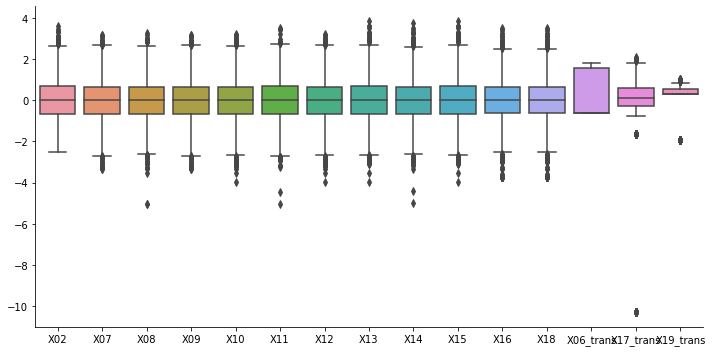

In [17]:
sns.catplot(data = pd.DataFrame(X_trans, columns=df_clean.columns), kind='box', aspect=2)

plt.show()

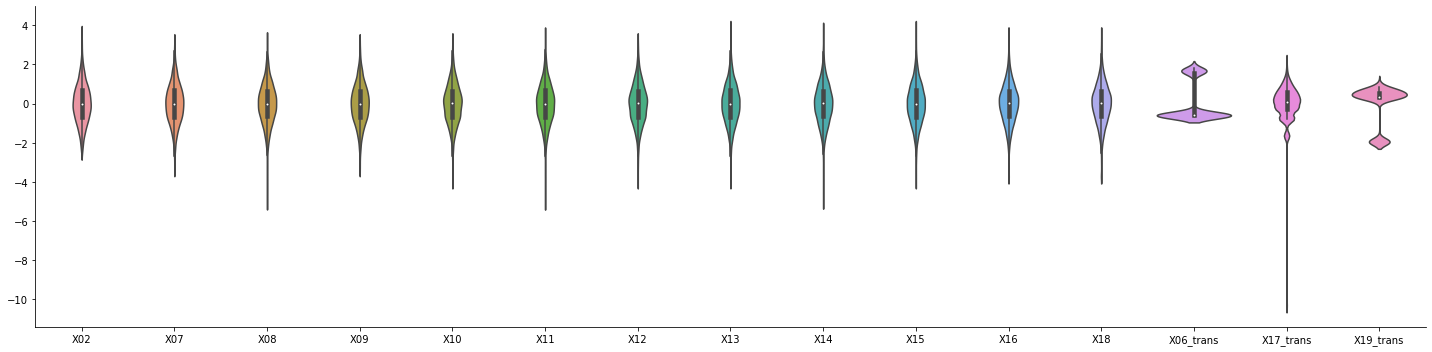

In [18]:
sns.catplot(data = pd.DataFrame(X_trans, columns=df_clean.columns), kind='violin', aspect=4)

plt.show()

In [19]:
k2_result = KMeans(n_clusters=2, random_state=101, n_init=100, max_iter=500).fit_predict(X_trans)

In [20]:
df_clean['k2'] = pd.Series( k2_result, index=df_clean.index )

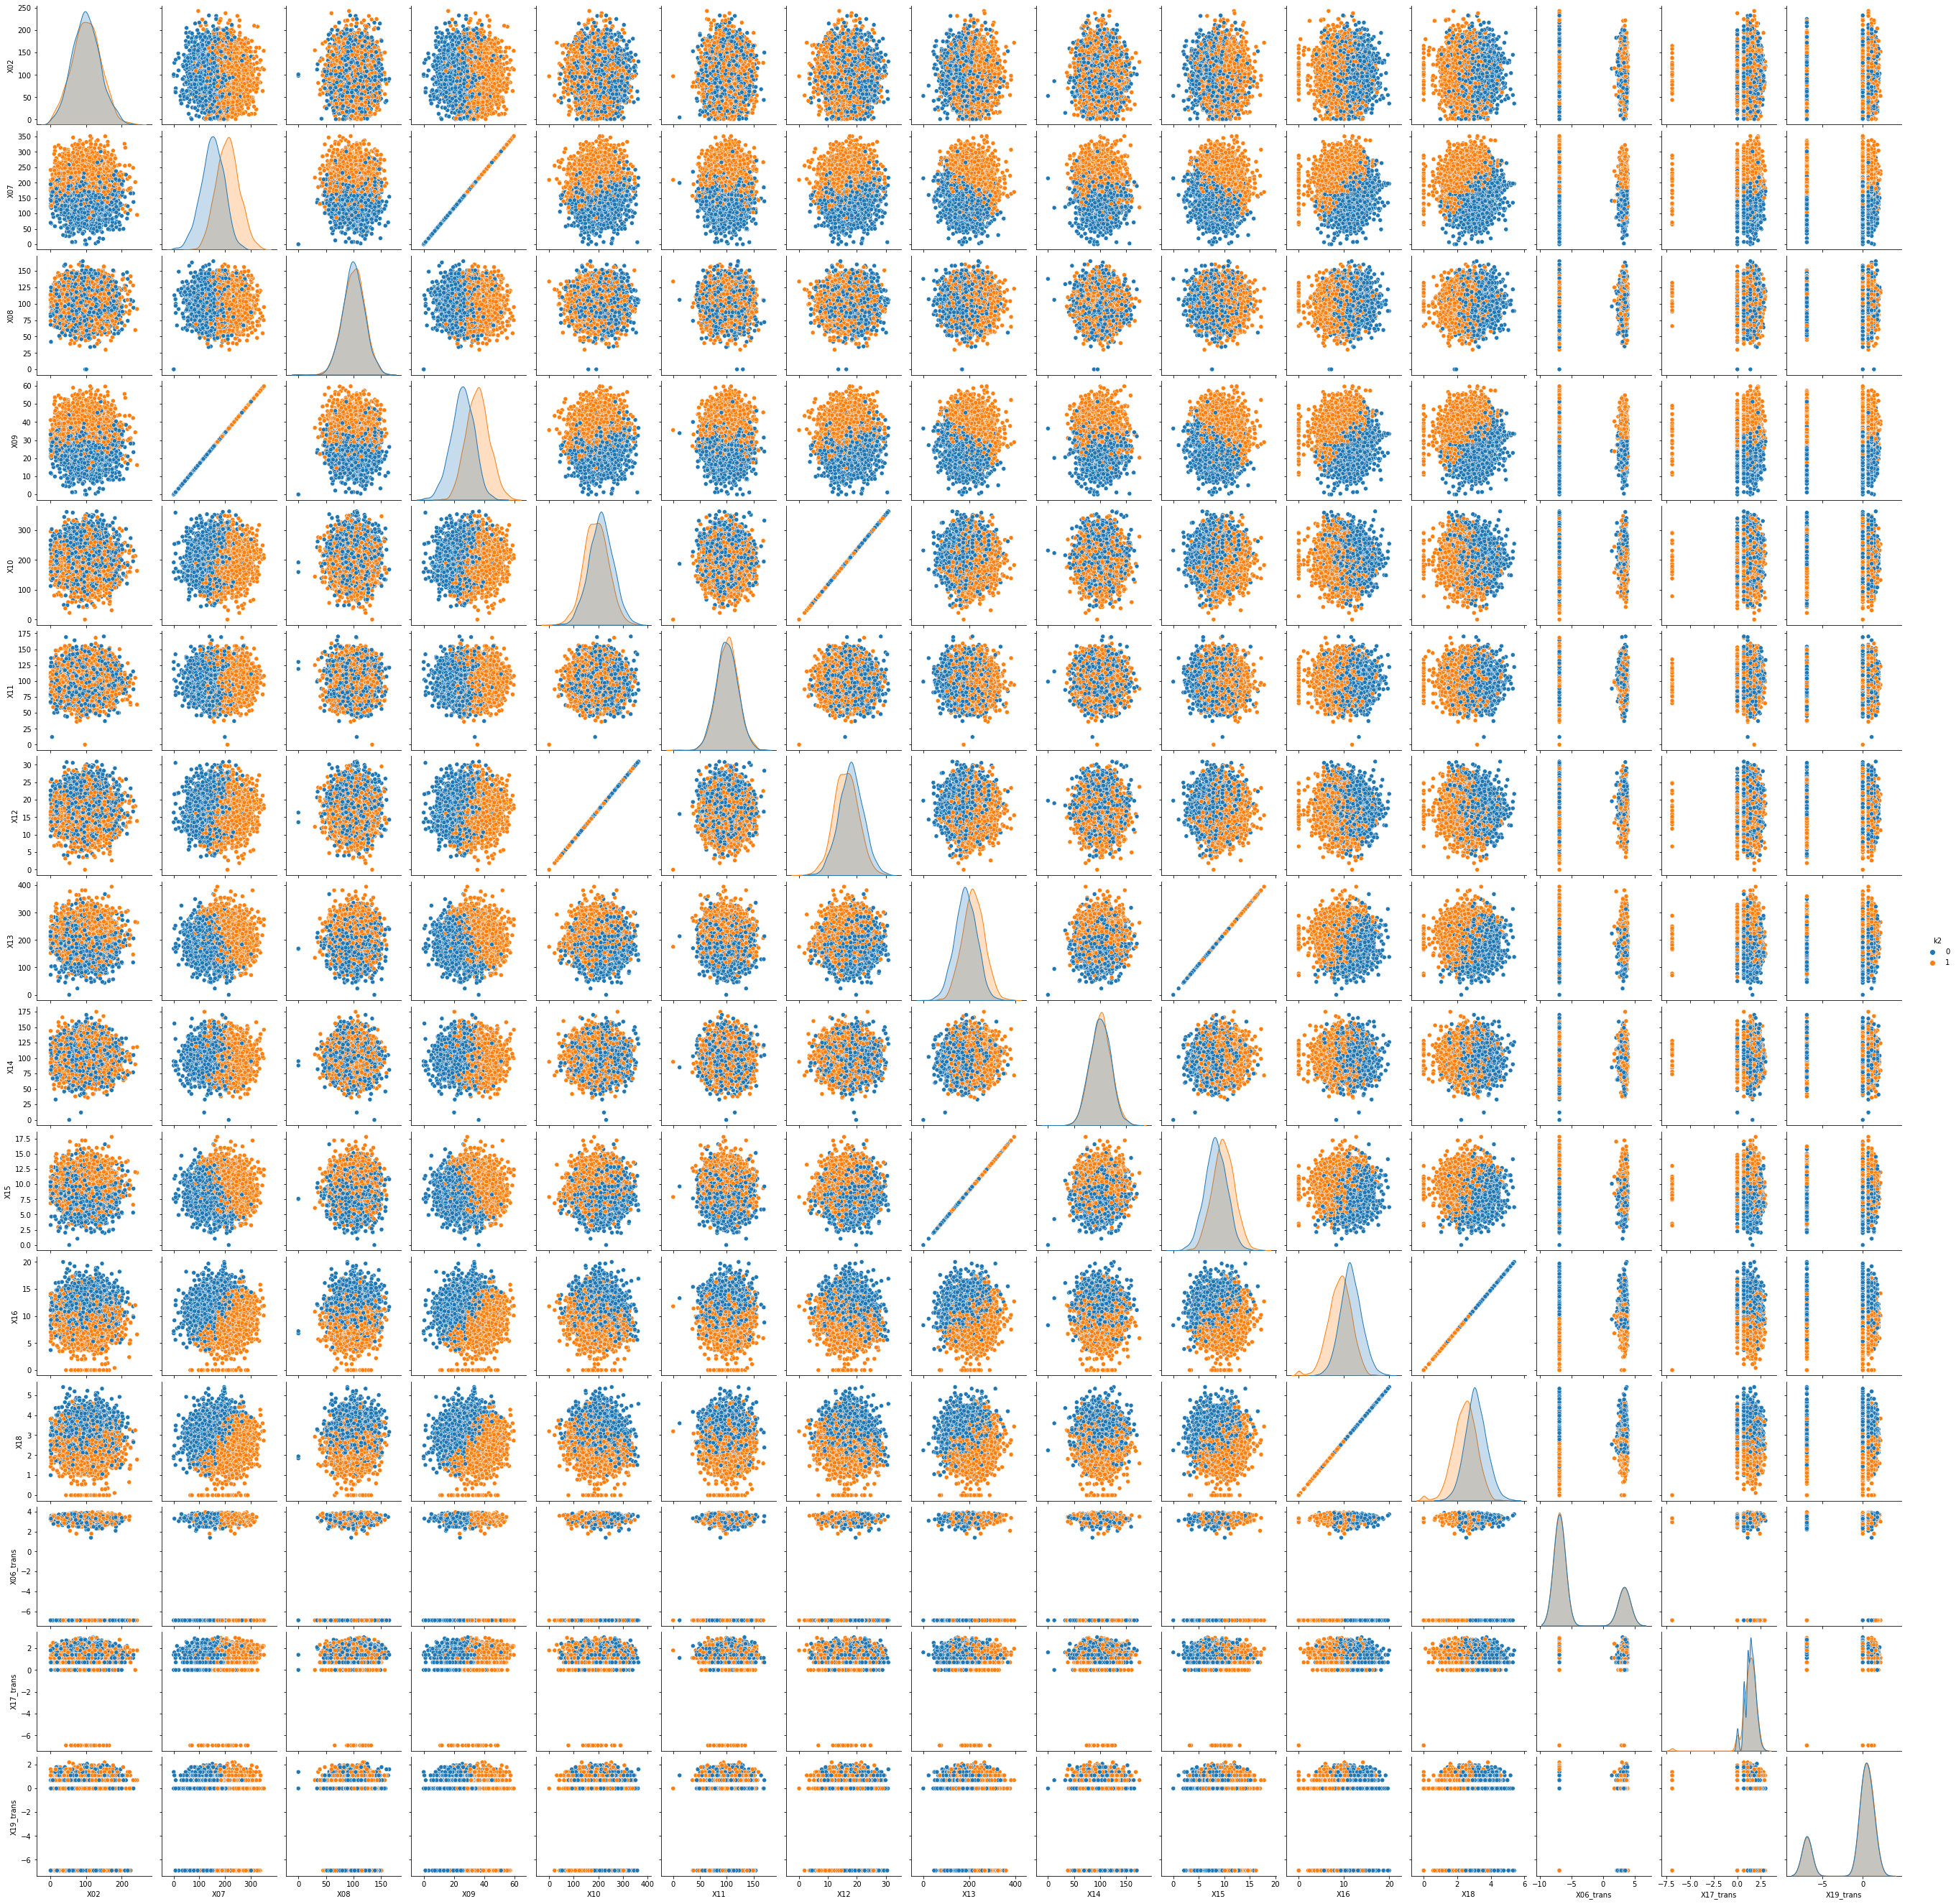

In [21]:
sns.pairplot(data = df_clean, hue='k2', diag_kws={'common_norm': False})

plt.show()

In [22]:
tots_within = []

K = range(1, 26)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit(X_trans)
    tots_within.append(km.inertia_)

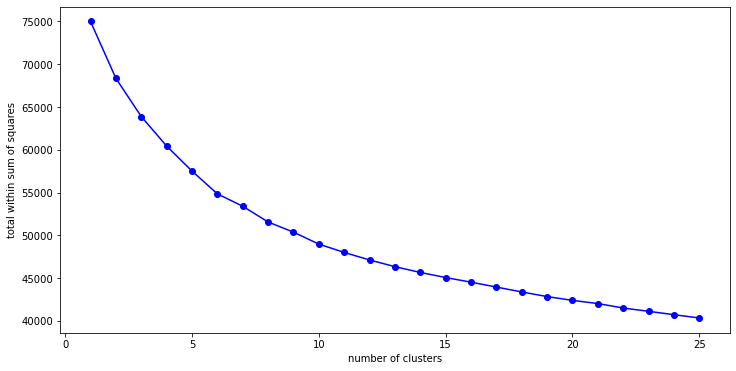

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(K, tots_within, 'bo-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

## Transforming the variables first and then performing log transform

In [24]:
df_c = df.select_dtypes('number').copy()

In [25]:
df_c.head()

X02  X06    X07  X08    X09    X10  X11    X12    X13  X14    X15   X16  \
0  128   25  265.1  110  45.07  197.4   99  16.78  244.7   91  11.01  10.0   
1  107   26  161.6  123  27.47  195.5  103  16.62  254.4  103  11.45  13.7   
2  137    0  243.4  114  41.38  121.2  110  10.30  162.6  104   7.32  12.2   
3   84    0  299.4   71  50.90   61.9   88   5.26  196.9   89   8.86   6.6   
4   75    0  166.7  113  28.34  148.3  122  12.61  186.9  121   8.41  10.1   

   X17   X18  X19  
0    3  2.70    1  
1    3  3.70    1  
2    5  3.29    0  
3    7  1.78    2  
4    3  2.73    3

In [26]:
df_c['lump_17'] = np.where(df_c.X17 > 5, 'Other', df_c.X17.astype('str'))
df_c['lump_19'] = np.where(df_c.X19 > 3, 'Other', df_c.X19.astype('str'))

In [27]:
df_c = df_c.drop(columns=['X06', 'X17', 'X19'])

In [28]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X02      5000 non-null   int64  
 1   X07      5000 non-null   float64
 2   X08      5000 non-null   int64  
 3   X09      5000 non-null   float64
 4   X10      5000 non-null   float64
 5   X11      5000 non-null   int64  
 6   X12      5000 non-null   float64
 7   X13      5000 non-null   float64
 8   X14      5000 non-null   int64  
 9   X15      5000 non-null   float64
 10  X16      5000 non-null   float64
 11  X18      5000 non-null   float64
 12  lump_17  5000 non-null   object 
 13  lump_19  5000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 547.0+ KB


In [29]:
df_clean2 = df_c.select_dtypes('number').copy()

In [30]:
df_clean2.head()

X02    X07  X08    X09    X10  X11    X12    X13  X14    X15   X16   X18
0  128  265.1  110  45.07  197.4   99  16.78  244.7   91  11.01  10.0  2.70
1  107  161.6  123  27.47  195.5  103  16.62  254.4  103  11.45  13.7  3.70
2  137  243.4  114  41.38  121.2  110  10.30  162.6  104   7.32  12.2  3.29
3   84  299.4   71  50.90   61.9   88   5.26  196.9   89   8.86   6.6  1.78
4   75  166.7  113  28.34  148.3  122  12.61  186.9  121   8.41  10.1  2.73

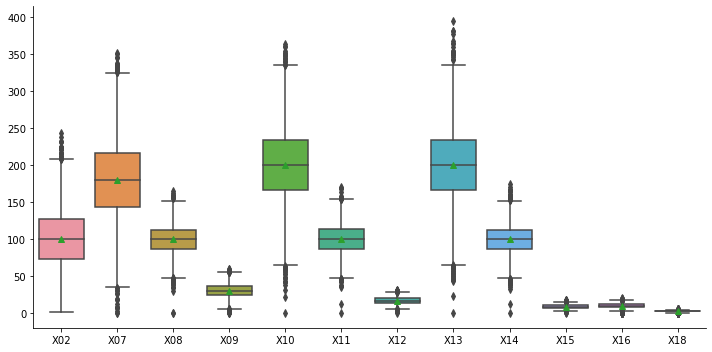

In [31]:
sns.catplot(data = df_clean2, kind='box', aspect=2, showmeans=True)

plt.show()

In [32]:
X_clean2 = StandardScaler().fit_transform(df_clean2)

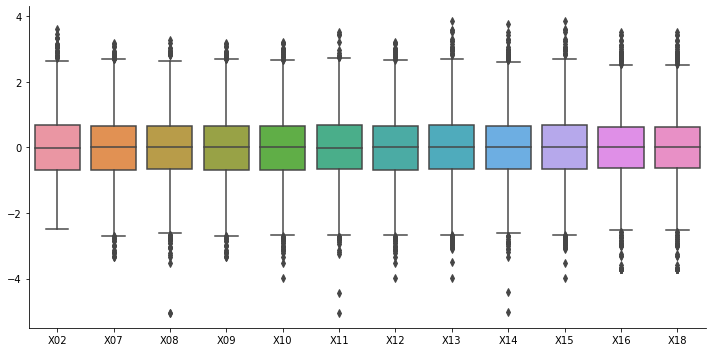

In [33]:
sns.catplot(data = pd.DataFrame(X_clean2, columns=df_clean2.columns), kind='box', aspect=2)

plt.show()

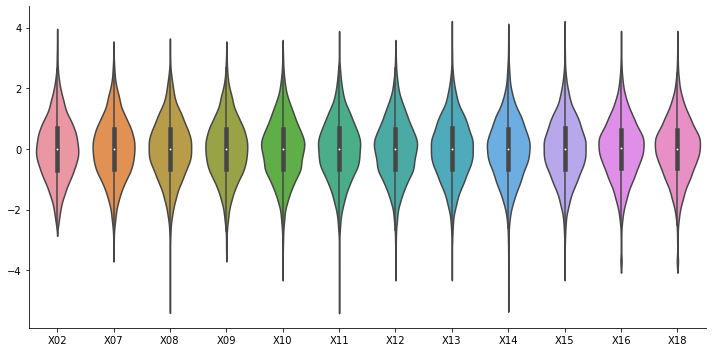

In [34]:
sns.catplot(data = pd.DataFrame(X_clean2, columns=df_clean2.columns), kind='violin', aspect=2)

plt.show()

## PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
churn_pcs = PCA(n_components=2).fit_transform( X_clean2 )

In [37]:
churn_pcs.shape

(5000, 2)

In [38]:
churn_pcs_df = pd.DataFrame( churn_pcs, columns=['pc_01', 'pc_02'])

In [39]:
churn_pcs_df['churn'] = df.churn

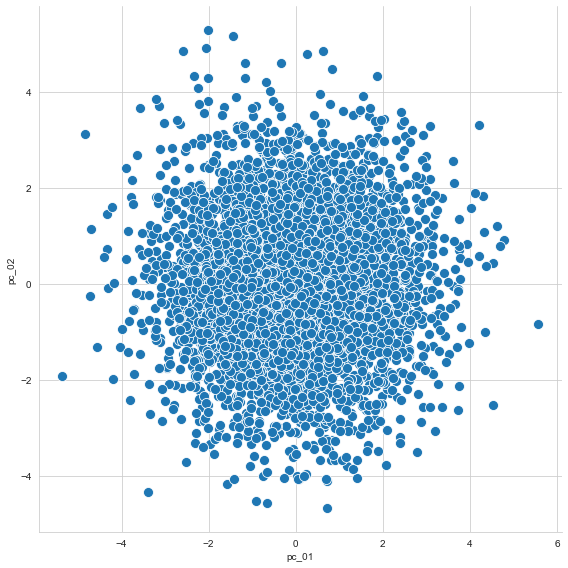

In [40]:
sns.set_style('whitegrid')

sns.relplot(data = churn_pcs_df, x='pc_01', y='pc_02', s=100, height=8)

plt.show()

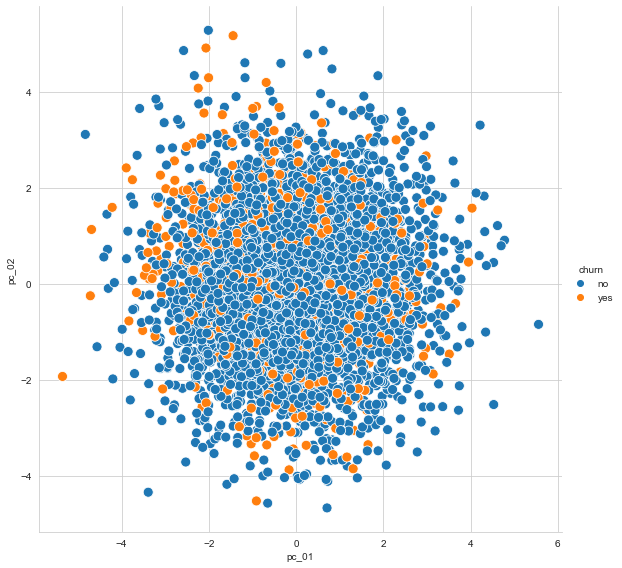

In [41]:
sns.relplot(data = churn_pcs_df, x='pc_01', y='pc_02', hue='churn', s=100, height=8)

plt.show()

In [42]:
tots_within = []

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit(X_clean2)
    tots_within.append(km.inertia_)

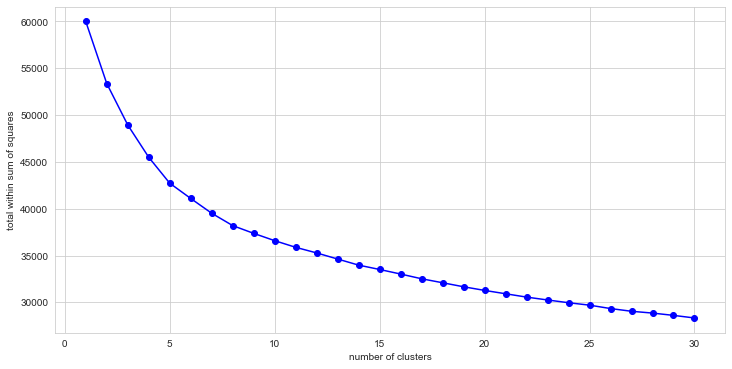

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(K, tots_within, 'bo-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

In [44]:
from sklearn.metrics import silhouette_score

In [45]:
sil_coef = []

K = range(2, 31)

for k in K:
    k_label = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500).fit_predict( X_clean2 )
    sil_coef.append( silhouette_score(X_clean2, k_label) )

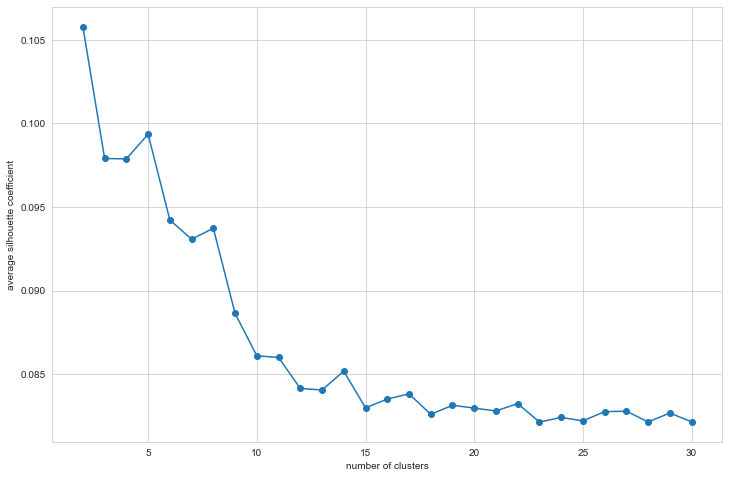

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(K, sil_coef, 'o-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('average silhouette coefficient')

plt.show()

## Hierarchical clustering

In [47]:
from scipy.cluster import hierarchy

### Complete linkage

In [48]:
hclust_complete = hierarchy.complete( X_clean2 )

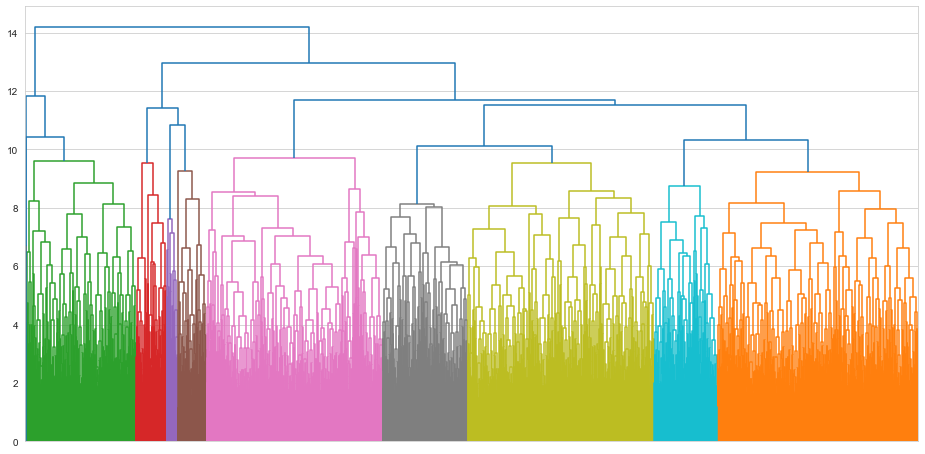

In [49]:
fig = plt.figure(figsize=(16,8))

dn = hierarchy.dendrogram( hclust_complete, no_labels=True )

plt.show()

In [50]:
### Ward method

In [51]:
hclust_ward = hierarchy.ward( X_clean2 )

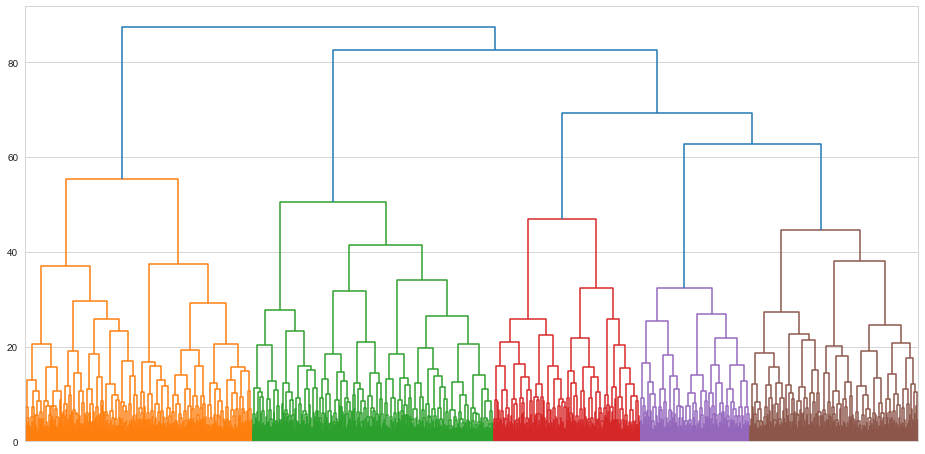

In [52]:
fig = plt.figure(figsize=(16,8))

dn = hierarchy.dendrogram( hclust_ward, no_labels=True )

plt.show()

From the above figure we see that we need to do use 5 clusters

## Cut the tree

In [53]:
ward_cut_5 = hierarchy.cut_tree( hclust_ward, n_clusters=5 )

In [54]:
churn_pcs_df['hclust_5'] = pd.Series( ward_cut_5.ravel(), index=churn_pcs_df.index)

churn_pcs_df['hclust_5'] = churn_pcs_df.hclust_5.astype('category')

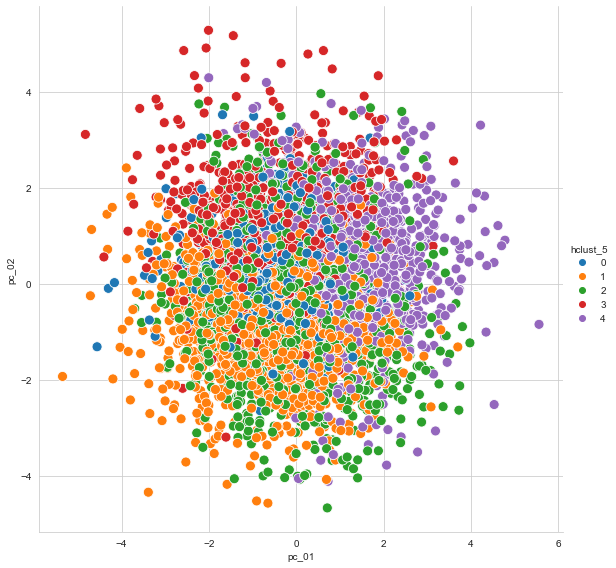

In [55]:
sns.relplot(data = churn_pcs_df, x='pc_01', y='pc_02', hue='hclust_5', s=100, height=8)

plt.show()

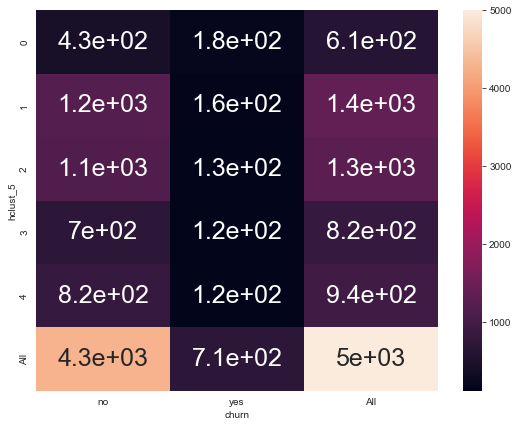

In [56]:
fig, ax = plt.subplots(figsize=(9,7))

sns.heatmap(pd.crosstab(churn_pcs_df.hclust_5, churn_pcs_df.churn, margins=True),
           annot=True, annot_kws={'size': 25})

plt.show()